In [152]:
#While your data companions rushed off to jobs in finance and government, 
#you remained adamant that science was the way for you. Staying true to your mission, 
#you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. 
#Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. 
#In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), 
#a commonly occurring form of skin cancer.

#As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. 
#In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. 
#Their physiological responses were then monitored over the course of that time. 
#Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.
#To do this you are tasked with:

#Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
#Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

In [153]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_csv = "data/mouse_drug_data.csv"
clinical_trial_data_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_csv)
clinical_trial_data = pd.read_csv(clinical_trial_data_csv)
#mouse_drug_data.head()
#clinical_trial_data.head()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_drug_data, clinical_trial_data, on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_data


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [154]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_timepoint_groups = merged_data.groupby(['Drug', 'Timepoint'])
mean_tumor_volume = drug_timepoint_groups.mean()['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

mean_tumor_volume_df.reset_index(inplace=True)

# Preview DataFrame
mean_tumor_volume_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [155]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_tumor_volume = drug_timepoint_groups.sem()["Tumor Volume (mm3)"]

# Convert to DataFrame

stderr_tumor_volume_df = pd.DataFrame(stderr_tumor_volume)
stderr_tumor_volume_df.reset_index(inplace=True)

# Preview DataFrame

stderr_tumor_volume_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [156]:
# Minor Data Munging to Re-Format the Data Frames

mean_tumor_volume = mean_tumor_volume_df.pivot(index = 'Timepoint',
                                            columns = 'Drug')['Tumor Volume (mm3)']
stderr_tumor_volume = stderr_tumor_volume_df.pivot(index = 'Timepoint',
                                          columns = 'Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
mean_tumor_volume.head()
#stderr_tumor_volume.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


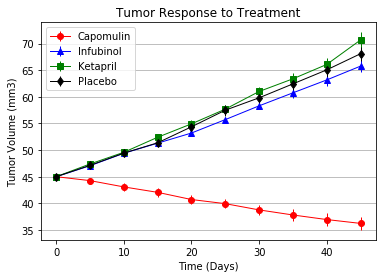

In [157]:
# Generate the Plot (with Error Bars)

capomulin_response = plt.errorbar(mean_tumor_volume.index, mean_tumor_volume['Capomulin'], yerr = stderr_tumor_volume['Capomulin'], color = 'r', marker = 'o', linewidth = 1, label="Capomulin")

infubinol_response = plt.errorbar(mean_tumor_volume.index, mean_tumor_volume['Infubinol'], yerr = stderr_tumor_volume['Infubinol'], color = 'b', marker = '^', linewidth = 1, label="Infubinol")

ketapril_response = plt.errorbar(mean_tumor_volume.index, mean_tumor_volume['Ketapril'], yerr = stderr_tumor_volume['Ketapril'], color = 'g', marker = 's', linewidth = 1, label="Ketapril")

placebo_response = plt.errorbar(mean_tumor_volume.index, mean_tumor_volume['Placebo'], yerr = stderr_tumor_volume['Placebo'], color = 'k', marker = 'd', linewidth = 1, label="Placebo")


#format plot
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis = 'y')
plt.title('Tumor Response to Treatment')
plt.legend(handles=[capomulin_response, infubinol_response, ketapril_response, placebo_response], loc="best")


# Save the Figure
plt.savefig('images/treatment.png')

# Show the figure
plt.show()


In [158]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [159]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_sites = drug_timepoint_groups.mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_sites_df = pd.DataFrame(metastatic_sites)
metastatic_sites_df.reset_index(inplace=True)

# Preview DataFrame

metastatic_sites_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [160]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_metastatic_sites = drug_timepoint_groups.sem()['Metastatic Sites']

# Convert to DataFrame
stderr_metastatic_sites_df = pd.DataFrame(stderr_metastatic_sites)
stderr_metastatic_sites_df.reset_index(inplace=True)

# Preview DataFrame
stderr_metastatic_sites_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [161]:
# Minor Data Munging to Re-Format the Data Frames

metastatic_sites = metastatic_sites_df.pivot(index = 'Timepoint', 
                          columns = 'Drug')['Metastatic Sites']

stderr_metastatic_sites = stderr_metastatic_sites_df.pivot(index = 'Timepoint',
                        columns = 'Drug')['Metastatic Sites']

# Preview that Reformatting worked

metastatic_sites
stderr_metastatic_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


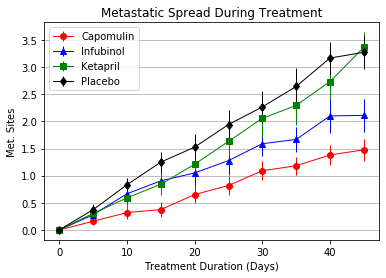

In [162]:
# Generate the Plot (with Error Bars)

capomulin_spread = plt.errorbar(metastatic_sites.index, metastatic_sites['Capomulin'], yerr = stderr_metastatic_sites['Capomulin'], color = 'r', marker = 'o', linewidth = 1, label="Capomulin")

infubinol_spread = plt.errorbar(metastatic_sites.index, metastatic_sites['Infubinol'], yerr = stderr_metastatic_sites['Infubinol'], color = 'b', marker = '^', linewidth = 1, label="Infubinol")

ketapril_spread = plt.errorbar(metastatic_sites.index, metastatic_sites['Ketapril'], yerr = stderr_metastatic_sites['Ketapril'], color = 'g', marker = 's', linewidth = 1, label="Ketapril")

placebo_spread = plt.errorbar(metastatic_sites.index, metastatic_sites['Placebo'], yerr = stderr_metastatic_sites['Placebo'], color = 'k', marker = 'd', linewidth = 1, label="Placebo")


#format plot
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(axis = 'y')
plt.title('Metastatic Spread During Treatment')
plt.legend(handles=[capomulin_spread, infubinol_spread, ketapril_spread, placebo_spread], loc="best")


# Save the Figure
plt.savefig('images/spread.png')

# Show the figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [163]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice = drug_timepoint_groups.count()['Metastatic Sites']

# Convert to DataFrame
count_of_mice_df = pd.DataFrame({"Mice Count":count_of_mice})
count_of_mice_df.reset_index(inplace = True)

# Preview DataFrame

count_of_mice_df

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [164]:
# Minor Data Munging to Re-Format the Data Frames

count_of_mice = count_of_mice_df.pivot(index = 'Timepoint', columns = 'Drug')['Mice Count']

# Preview the Data Frame

count_of_mice.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [165]:
#mouse survival rate

mouse_survival_rate = (count_of_mice / count_of_mice.iloc[0, :]) * 100
mouse_survival_rate.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


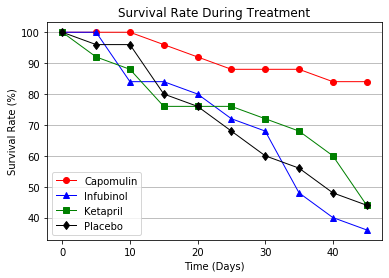

In [166]:
# Generate the Plot  (Accounting for percentages)

capomulin_survival = plt.plot(mouse_survival_rate['Capomulin'], color = 'r', marker = 'o', linewidth = 1)

infubinol_survival = plt.plot(mouse_survival_rate['Infubinol'], color = 'b', marker = '^', linewidth = 1)

ketapril_survival = plt.plot(mouse_survival_rate['Ketapril'], color = 'g', marker = 's', linewidth = 1)

placebo_survival = plt.plot(mouse_survival_rate ['Placebo'], color = 'k', marker = 'd', linewidth = 1)


#format plot
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid(axis = 'y')
plt.title('Survival Rate During Treatment')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best")


# Save the Figure
plt.savefig('images/survival.png')

# Show the figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [167]:
# Calculate the percent changes for each drug
tumor_volume_change = (mean_tumor_volume.iloc[-1] - mean_tumor_volume.iloc[0]) * 100 / mean_tumor_volume.iloc[0]

# Display the data to confirm

tumor_volume_change



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

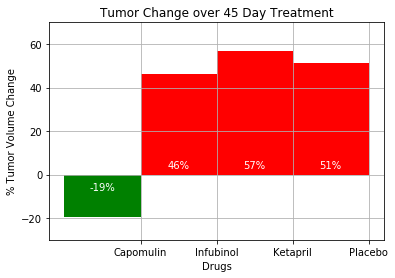

In [179]:
# Store all Relevant Percent Changes into a Tuple
tumor_changes = (tumor_volume_change['Capomulin'],
               tumor_volume_change['Infubinol'],
               tumor_volume_change['Ketapril'],
               tumor_volume_change['Placebo'])
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


# Splice the data between passing and failing drugs

passingdrugs = tumor_volume_change < 0
barplot = plt.bar(drugs,tumor_changes,width=-1,align="edge",color=passingdrugs.map({True:'g',False:'r'}))

# Orient widths. Add labels, tick marks, etc. 

plt.grid()

plt.ylim(-30,70)
plt.xlabel('Drugs')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')


# Call functions to implement the function calls

def label(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(bar.get_x() + bar.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
        

label(barplot)

# Save the Figure
fig.savefig('images/change.png')


# Show the Figure
fig.show()



![Metastatic Spread During Treatment](../Images/change.png)